In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [4]:
# Ensures the charts are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
# Define the path
path = r'C:\Users\User\Documents\Career Foundry\Data Analytics Immersion\Data Immersion 6. Advanced Analytics & Dashboard Design'

# Load the cleaned dataset
df = pd.read_excel(os.path.join(path, '6.2', 'flavors_of_cacao_cleaned.xlsx'))

# Display the first few rows to verify
df.head()

,ref,company_name,company_location,review_date,country_of_bean_origin,bean_origin_or_bar,cocoa_percent,ingredients,memorable_characteristics,rating
0,5,Jacque Torres,USA,2006-01-01,Ghana,Trinatario Treasure,0.71,"5- B,S,C,V,L","gritty, unrefined, off notes",2.00
1,15,Green & Black's (ICAM),UK,2006-01-01,Multiple Countries,Dark,0.70,"5- B,S,C,V,L","mildly rich, basic, roasty",2.50
2,15,Guittard,USA,2006-01-01,Colombia,Chucuri,0.65,"5- B,S,C,V,L","creamy, sweet, floral, vanilla",3.00
3,15,Neuhaus (Callebaut),Belgium,2006-01-01,Sao Tome,Sao Tome,0.75,"5- B,S,C,V,L","grassy, earthy, burnt",2.75
4,15,Neuhaus (Callebaut),Belgium,2006-01-01,Multiple Countries,West Africa,0.73,"5- B,S,C,V,L","non descript, poor aftertaste",2.00


In [6]:
# Create a correlation matrix using pandas

df.corr()

ValueError: could not convert string to float: 'Jacque Torres'

### Error caused by non-numeric columns.

In [17]:
print(df.dtypes)

ref                                   int64
company_name                         object
company_location                     object
review_date                  datetime64[ns]
country_of_bean_origin               object
bean_origin_or_bar                   object
cocoa_percent                       float64
ingredients                          object
memorable_characteristics            object
rating                              float64
dtype: object


In [18]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Display the correlation matrix
print(correlation_matrix)

                    ref  cocoa_percent    rating
ref            1.000000       0.001502  0.106136
cocoa_percent  0.001502       1.000000 -0.139617
rating         0.106136      -0.139617  1.000000


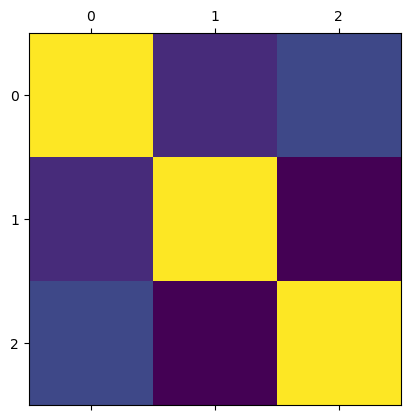

In [19]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_numeric.corr())
plt.show()

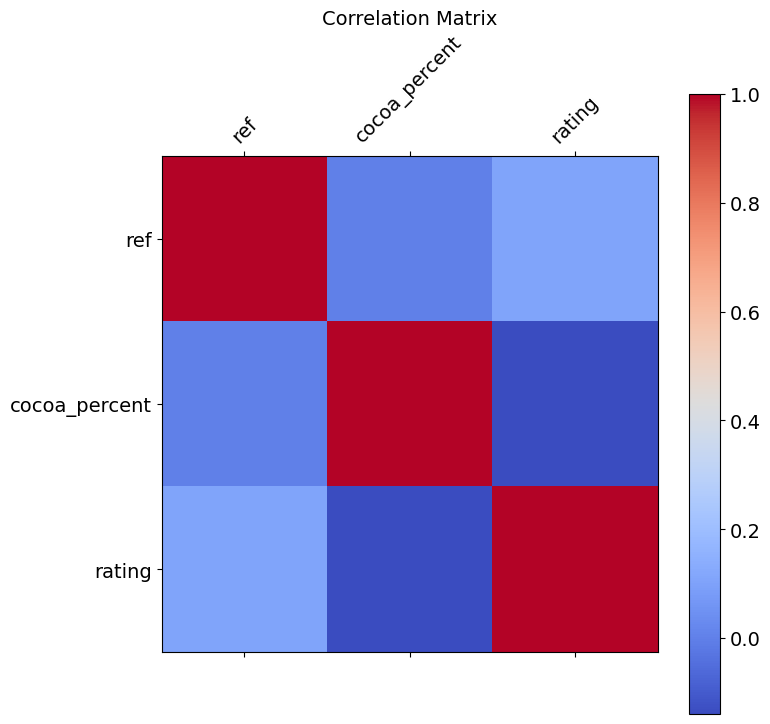

In [20]:
# Add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(8, 8))
plt.matshow(df_numeric.corr(), fignum=f.number, cmap='coolwarm')
plt.xticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=14, rotation=45)
plt.yticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

### Key Observations
1. **ref has a correlation close to zero with both cocoa_percent and rating.**  
    - ref is just an identifier and does not influence or relate to any meaningful variable.
2. **cocoa_percent and rating has a weak negative relationship**
3. **we should explore other factors which might be more influential in determining chocolate ratings**

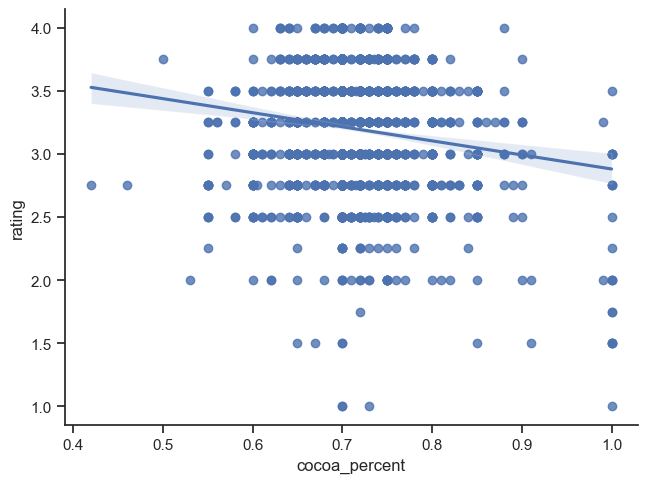

In [42]:
# Create scatter plot with regression line
g = sns.lmplot(x='cocoa_percent', y='rating', data=df)

# ✅ Explicitly set the figure size
g.fig.set_size_inches(7, 5)

# ✅ Save before showing
g.fig.savefig("cocoa_vs_rating.png", dpi=300, bbox_inches='tight')

# Now show the plot
plt.show()

### Key Observations: Cocoa Percent vs. Rating  

1. **Most ratings are between 3.0 and 4.0**  
   - Chocolates with **60-80% cocoa** tend to receive ratings in this range.  
   - This suggests most chocolates cluster here, regardless of cocoa percentage.  

2. **Higher cocoa percentage (85%+) tends to have lower ratings**  
   - As cocoa content **approaches 100%**, ratings become more spread out and slightly lower.  
   - This might be due to **higher bitterness**, which may not appeal to all reviewers.  

3. **Low-rated chocolates exist at all cocoa levels**  
   - Some chocolates received ratings **below 2.5** at different cocoa percentages.  
   - This suggests other factors, like **bean origin, processing, or company**, also influence ratings.  

<Figure size 640x480 with 0 Axes>

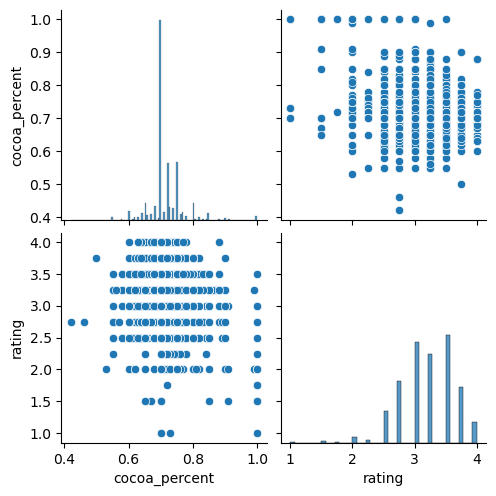

In [25]:
# Pair Plot
# Select only numerical variables, excluding 'ref' (Pair plots show scatter plots between variables, which only makes sense for numbers)
df_numeric = df.select_dtypes(include=['number']).drop(columns=['ref'])

# Create a pair plot for selected variables
g = sns.pairplot(df_numeric)  # 'kde' makes diagonal plots smoother
plt.show()

### Key Observations from the Pair Plot  

1. **Cocoa Percentage Distribution**  
    - Most chocolates have **60-80% cocoa content**.  
    - Very few chocolates have **extreme cocoa percentages (near 100% or below 50%)**.  

2.  **Ratings Distribution**  
    - Ratings mostly range between **2.5 and 4.0**, with peaks around **3.0 to 3.5**.  

3.  **Cocoa Percentage vs. Rating**  
    - No strong pattern, but **higher cocoa content might slightly lower ratings**.  

4. **Number of Ingredients vs. Rating**  
   - Most chocolates have **1-3 ingredients**.  
   - No clear trend between **more ingredients and higher/lower ratings**.  

In [27]:
# Categorize the ratings based on the scale
df.loc[df['rating'] >= 4.0, 'rating_category'] = 'Outstanding'
df.loc[(df['rating'] >= 3.5) & (df['rating'] < 4.0), 'rating_category'] = 'Highly Recommended'
df.loc[(df['rating'] >= 3.0) & (df['rating'] < 3.5), 'rating_category'] = 'Recommended'
df.loc[(df['rating'] >= 2.0) & (df['rating'] < 3.0), 'rating_category'] = 'Disappointing'
df.loc[df['rating'] < 2.0, 'rating_category'] = 'Unpleasant'

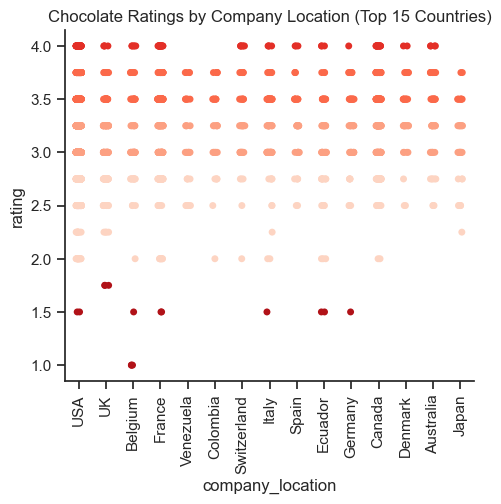

In [28]:
# Limit the data to the first 15 company locations
top_15_locations = df['company_location'].value_counts().head(15).index
df_limited = df[df['company_location'].isin(top_15_locations)]


# Create the categorical plot with a specific color
sns.set(style="ticks")

# Create the categorical plot with a single color for the hue
g = sns.catplot(x="company_location", y="rating", hue="rating_category", data=df_limited, kind="strip", palette="Reds", legend=False)
# 
# Rotate the x-axis labels and adjust the plot spacing
plt.xticks(rotation=90, ha='center')
plt.tight_layout()

# Add the title
plt.title('Chocolate Ratings by Company Location (Top 15 Countries)')

plt.show()

### Key Insights:

- **Most chocolates are rated 3.0 to 3.5**: Generally, chocolates are rated as "Recommended" or "Highly Recommended."
  
- **Top-rated countries**:  
  - **USA** and **Switzerland** have more chocolates in the **"Outstanding"** and **"Highly Recommended"** categories.

- **Lower-rated countries**:  
  - **Venezuela** and **Ecuador** have a mix of ratings, but they do not stand out as the countries with the lowest ratings overall. 

- **Overall trend**:  
  - Most countries have chocolates rated **"Recommended"** or **"Highly Recommended"**, with only a few outliers dipping into the **"Unpleasant"** or **"Disappointing"** categories.

### Revisited Questions and Answers Based on Exploration:

1. **How does cocoa percentage influence chocolate ratings?**
   - Cocoa percentage doesn’t strongly affect ratings. Most chocolates with cocoa between 60% and 80% fall in the "Recommended" or "Highly Recommended" range.

2. **Which companies consistently receive the highest ratings?**
   - Companies in the **USA** and **Switzerland** tend to have chocolates rated as "Outstanding" or "Highly Recommended."

3. **Which countries produce the highest-rated chocolate bars?**
   - **USA** and **Switzerland** produce the highest-rated chocolates, with more chocolates in the "Highly Recommended" or "Outstanding" categories.

4. **Do chocolates from certain regions or countries receive higher ratings on average?**
   - Yes, chocolates from the **USA** and **Switzerland** receive higher ratings, while countries like **Ecuador** and **Venezuela** show more mixed ratings, including some in the "Disappointing" or "Unpleasant" categories.

5. **Is there a relationship between cocoa solids percentage and rating?**
   - There’s a weak correlation between cocoa percentage and rating. The ratings are spread out across cocoa percentages, suggesting it doesn't directly affect the rating.

6. **How do different chocolate ingredients impact ratings?**
   - Ingredients might affect ratings, but we haven’t explored this in detail yet. Some ingredients lead to more consistent ratings, while others show more variability.

### New Questions to Explore:

1. **How does the country of cocoa bean origin affect chocolate ratings?**
   - This question explores whether chocolates made with cocoa from certain countries tend to have higher ratings.

2. **Does the number of ingredients in a chocolate bar influence its rating?**
   - This question examines if chocolates with more or fewer ingredients have higher or lower ratings, which could give insight into experts' preferences.

### Hypotheses to Test:

1. **Hypothesis 1**: Chocolates with cocoa percentages above 70% are rated lower compared to those with cocoa percentages between 60%-70%.
   - **Test**: Compare the average ratings of chocolates with cocoa percentages above 70% to those below and between 60%-70%.

2. **Hypothesis 2**: Countries like the USA and Switzerland produce chocolates that receive "Highly Recommended" or "Outstanding" ratings more frequently.
   - **Test**: Calculate the proportion of chocolates in the "Highly Recommended" and "Outstanding" categories for the top-rated countries, based on "company_location".

3. **Hypothesis 3**: The type of ingredients in chocolates significantly impacts the ratings, with certain ingredients leading to higher ratings.
   - **Test**: Perform a comparison of ratings for chocolates based on different ingredients listed in the "ingredients" column.
   - This might be trickier than the first two hypotheses because the ingredients listed in the "ingredients" column are already combined, so it's difficult to pinpoint the exact ingredients that impact the ratings.